5


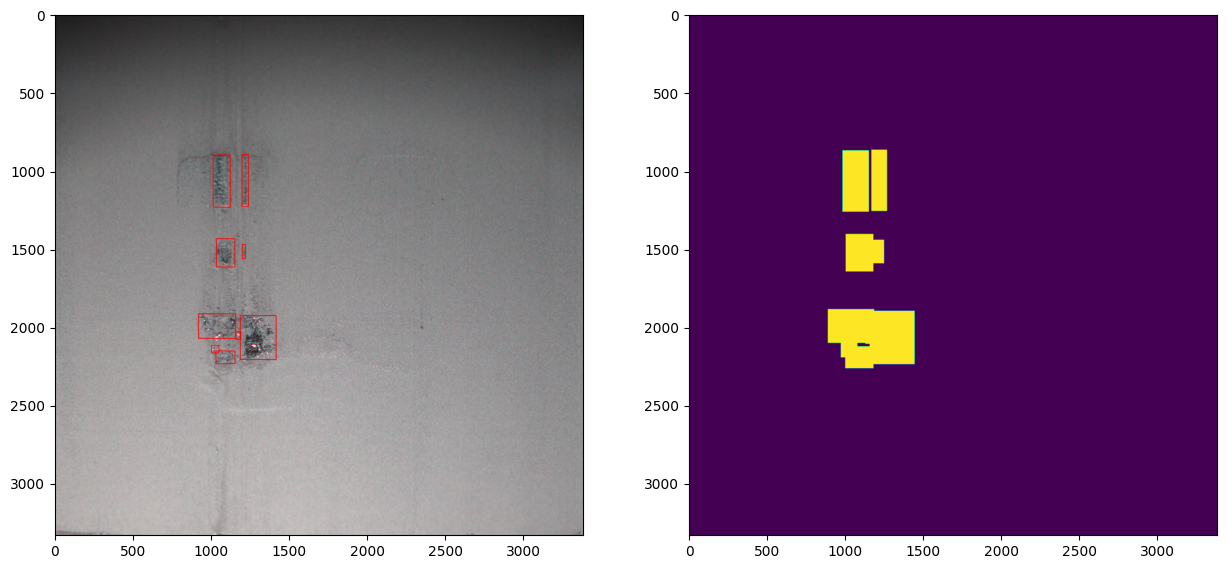

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

index = 94
img_path = './data/yolov5/Train/images/powder_uncover_{}.png'.format(index)
label_path = './data/yolov5/Train/labels/powder_uncover_{}.txt'.format(index)

im = cv2.imread(img_path)
im_h, im_w, im_c = im.shape
with open(label_path, 'r') as f:
    lines = f.readlines()


bboxs = []

expand = 30
new_mask = np.zeros((im_h, im_w), dtype=np.uint8)
for line in lines:
    line = [float(e) for e in line.split(' ')]
    cls_idx , center_x, center_y, w, h = line
    cls_idx = int(cls_idx)


    l_x, r_x = (center_x - (w / 2)) * im_w, (center_x + (w / 2)) * im_w
    l_y, r_y = (center_y - (h / 2)) * im_h, (center_y + (h / 2)) * im_h
    cv2.rectangle(im, (int(l_x), int(l_y)), (int(r_x), int(r_y)), (255, 0, 0), 3, cv2.LINE_AA)
    bboxs.append([l_x, l_y, r_x, r_y])

    l_x = max(int(l_x) - expand, 0)
    r_x = min(int(r_x) + expand, im_w)
    l_y = max(int(l_y) - expand, 0)
    r_y = min(int(r_y) + expand, im_h)
    new_mask[l_y : r_y, l_x:r_x] = 255

plt.figure(figsize=(15, 7))
ax = plt.subplot(1,2,1)    
ax.imshow(im)
ax = plt.subplot(1,2,2)  
ax.imshow(new_mask)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(new_mask, connectivity=8, ltype=cv2.CV_16U)
print(num_labels)

In [3]:
stats

array([[       0,        0,     3384,     3330, 10924677],
       [    1166,      862,      101,      393,    39693],
       [     981,      866,      170,      394,    66980],
       [    1002,     1402,      246,      241,    53166],
       [     888,     1883,      556,      379,   184204]], dtype=int32)